<a href="https://colab.research.google.com/github/alice410451027/testrepo/blob/main/L5_SupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
#Load iris dataset
iris=load_iris()


#Convert to Data Frame
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['Species']=iris.target

#Display structure
print(iris_df.info())
from sklearn.model_selection import train_test_split

#Splitting into training and testing sets
iris_train,iris_test = train_test_split(iris_df,test_size=0.2,random_state=123) #使用 train_test_split 將數據集分割為訓練集和測試集，其中 20% 的數據用於測試，80% 用於訓練。random_state=123 確保每次運行時分割結果相同，以便重現。

#Display class distribution
print("TrainingSet:")
print(iris_train['Species'].value_counts())
print("\nTestingSet:")
print(iris_test['Species'].value_counts())

# Define features and target
X_train=iris_train.drop(columns=['Species'])
X_test=iris_test.drop(columns=['Species'])
y_train=iris_train['Species']
y_test=iris_test['Species']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
TrainingSet:
Species
1    44
2    39
0    37
Name: count, dtype: int64

TestingSet:
Species
0    13
2    11
1     6
Name: count, dtype: int64


#Random Forest

##Step1：
##Fit the model with training data and check performances (accuracy rate,confusion matrix, classification report)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
#Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=123,n_estimators=100)

#Fit the model
rf_classifier.fit(X_train,y_train)

#Use the model to predict the training data
y_pred_rf_train = rf_classifier.predict(X_train)

#Calculate accuracy for the training data
accuracy_rf_train = accuracy_score(y_train,y_pred_rf_train)
print(f'Accuracy:{accuracy_rf_train:.4f}')

#Compute the confusion matrix for the training data
cm_rf_train = confusion_matrix(y_train,y_pred_rf_train)

#Print confusion matrix for the training data
print("ConfusionMatrix(onTrainingData):")
print(cm_rf_train)

#Generate classification report for the training data
report_rf_train = classification_report(y_train,y_pred_rf_train)
print("\nClassificationReport:")
print(report_rf_train)

Accuracy:1.0000
ConfusionMatrix(onTrainingData):
[[37  0  0]
 [ 0 44  0]
 [ 0  0 39]]

ClassificationReport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



##Step2：
##Predict with testing data and check performances

Accuracy:0.9333


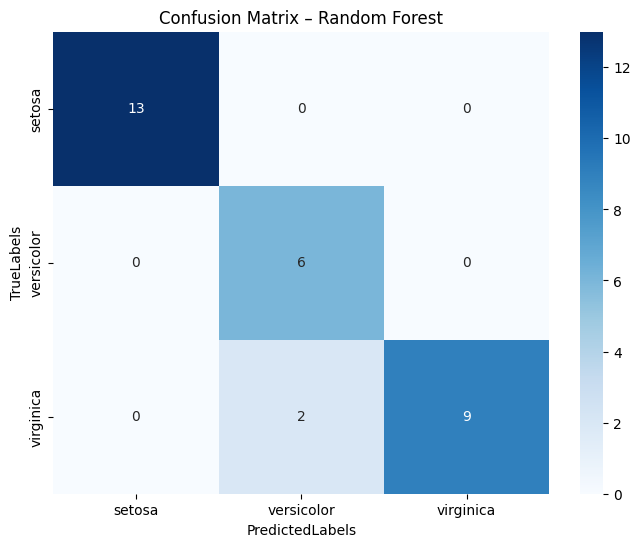


ClassificationReport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
#Predict on the test set
y_pred_rf=rf_classifier.predict(X_test)

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate accuracy
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print(f'Accuracy:{accuracy_rf:.4f}')

#Calculate confusion matrix
cm_rf = confusion_matrix(y_test,y_pred_rf)

#Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Blues',xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix – Random Forest')
plt.xlabel('PredictedLabels')
plt.ylabel('TrueLabels')
plt.show()

#Generate classification report
report = classification_report(y_test,y_pred_rf)
print("\nClassificationReport:")
print(report)

In [ ]:
cm_rf

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  2,  9]])

FeatureImportance:

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
[0.09289778 0.02081047 0.46263682 0.42365493]


Text(0.5, 1.0, 'Global Feature Importance')

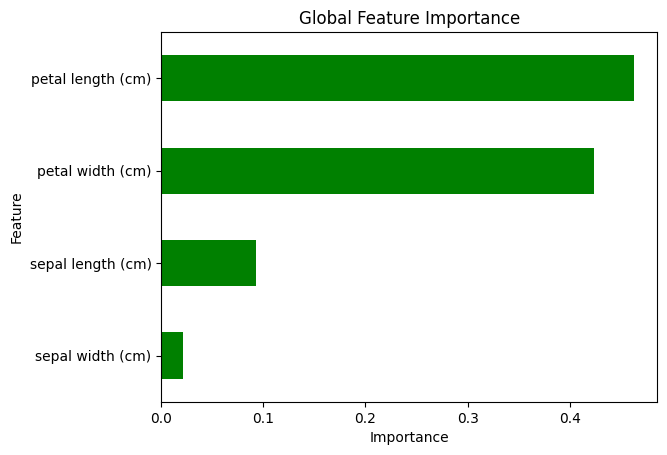

In [ ]:
import matplotlib.pyplot as plt
#feature importance
print("FeatureImportance:\n")
print(X_train.columns)
imp = rf_classifier.feature_importances_
print(imp)
importances = pd.Series(rf_classifier.feature_importances_,index=X_train.columns)
importances.sort_values(ascending=True,inplace=True)
importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")

#SVM

##Step1:Fit the model with training data and check performances

In [ ]:
from sklearn.svm import SVC
#Create SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear',random_state=123)

#Fit the model
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=123)

In [ ]:
#Use the model to predict the training data
y_pred_svm_train = svm_classifier.predict(X_train)

#Calculate accuracy for the training data
accuracy_svm_train = accuracy_score(y_train,y_pred_svm_train)
print(f'Accuracy:{accuracy_svm_train:.4f}')

#Compute the confusion matrix for the training data
cm_svm_train = confusion_matrix(y_train,y_pred_svm_train)

#Print confusion matrix for the training data
print("ConfusionMatrix(onTrainingData):")
print(cm_svm_train)

#Generate classification report for the training data
report_svm_train = classification_report(y_train,y_pred_svm_train)
print("\nClassificationReport:")
print(report_svm_train)

Accuracy:0.9917
ConfusionMatrix(onTrainingData):
[[37  0  0]
 [ 0 43  1]
 [ 0  0 39]]

ClassificationReport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.98      0.99        44
           2       0.97      1.00      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



##Step2:Predict with testing data and check performances

Accuracy(SVMwithlinearkernel):0.9667


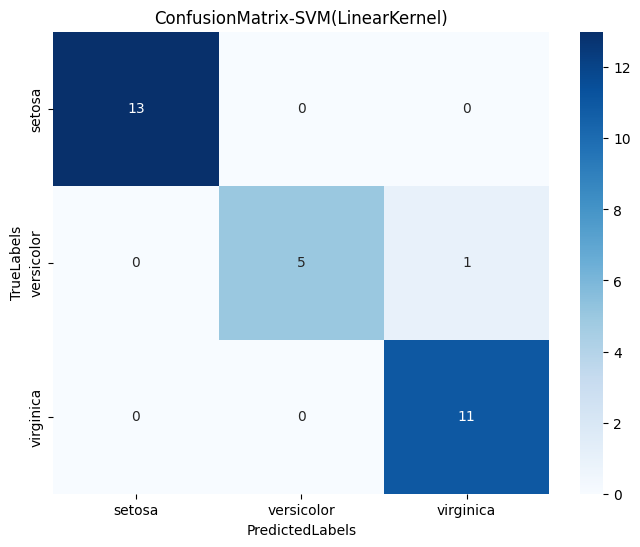


ClassificationReport:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate accuracy
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print(f'Accuracy(SVMwithlinearkernel):{accuracy_svm:.4f}')

#Calculate confusion matrix
cm_svm = confusion_matrix(y_test,y_pred_svm)

#Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm,annot=True,fmt='d',cmap='Blues',xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('ConfusionMatrix-SVM(LinearKernel)')
plt.xlabel('PredictedLabels')
plt.ylabel('TrueLabels')
plt.show()

#Generate classification report
report_svm = classification_report(y_test,y_pred_svm)
print("\nClassificationReport:")
print(report_svm)

#ANN

##Step1:
##Fit the model with training data and check performances. For ANN, we label encode the target variables and standardize the features because ANN is sensitive to the scale of the input. We add two hidden layers (with 2 units each) and set the output layer unit to 3 because the target variable, Species has 3 labels.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Label encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize the ANN
model = Sequential()

#Add input layer and first hidden layer
model.add(Dense(units=2,activation='relu',input_shape=(X_train_scaled.shape[1],)))

#Add second hidden layer
model.add(Dense(units=2,activation='relu'))

#Add output layer
model.add(Dense(units=3,activation='softmax'))

#Compile the ANN
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the ANN
model.fit(X_train_scaled,y_train_encoded,epochs=50,batch_size=10,validation_split=0.2, verbose =0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Make predictions on the train set
y_pred_prob_ann_train = model.predict(X_train_scaled)
y_pred_ann_train = y_pred_prob_ann_train.argmax(axis=1)

#Calculate accuracy for the training data
accuracy_ann_train = accuracy_score(y_train,y_pred_ann_train)
print(f'Accuracy:{accuracy_ann_train:.4f}')

#Compute the confusion matrix for the training data
cm_ann_train=confusion_matrix(y_train,y_pred_ann_train)

#Print confusion matrix for the training data
print("ConfusionMatrix(onTrainingData):")
print(cm_ann_train)

#Generate classification report for the training data
report_ann_train=classification_report(y_train,y_pred_ann_train)
print("\nClassificationReport:")
print(report_ann_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Accuracy:0.8000
ConfusionMatrix(onTrainingData):
[[37  0  0]
 [ 9 22 13]
 [ 0  2 37]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        37
           1       0.92      0.50      0.65        44
           2       0.74      0.95      0.83        39

    accuracy                           0.80       120
   macro avg       0.82      0.82      0.79       120
weighted avg       0.82      0.80      0.78       120



##Step2:
##Predict with testing data and check performances

In [ ]:
#Make predictions on the test set
y_pred_prob_ann = model.predict(X_test_scaled)
y_pred_ann = y_pred_prob_ann.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Accuracy:0.9333


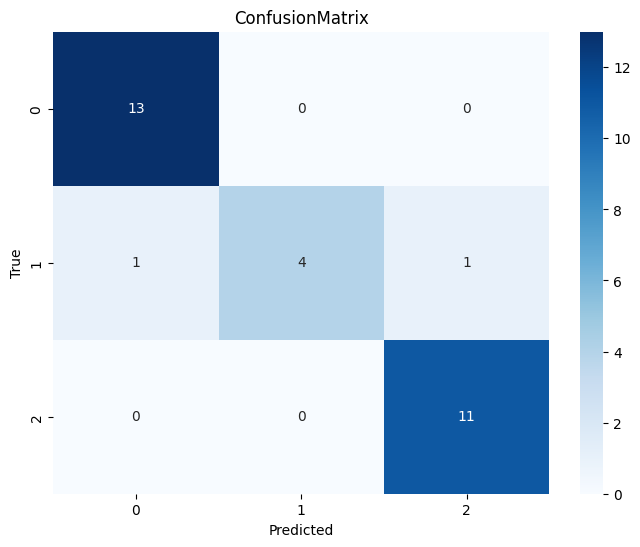


ClassificationReport:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.67      0.80         6
           2       0.92      1.00      0.96        11

    accuracy                           0.93        30
   macro avg       0.95      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate accuracy
accuracy_ann = accuracy_score(y_test,y_pred_ann)
print(f'Accuracy:{accuracy_ann:.4f}')

#Create the confusion matrix
cm_ann = confusion_matrix(y_test_encoded,y_pred_ann)

#Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_ann,annot=True,fmt='d',cmap='Blues',
xticklabels = label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ConfusionMatrix')
plt.show()

#Generate classification report
report_ann = classification_report(y_test,y_pred_ann)
print("\nClassificationReport:")
print(report_ann)

#Descriptive Discriminant Analysis

##Import WOW_data.csv, and name it to ‘DDA_raw’. Choose variables we want to analyze, and save it as ’DDA’.
###(3: ethnic, 25: WA_S_1, 20: WA_S_2, 14: WA_S_3)

In [ ]:
import pandas as pd
#Import the CSV file
DDA_raw=pd.read_csv('WOW_data.csv')

#Choose variables(columns)and save as DDA
columns_to_select=[2,24,19,13]
DDA=DDA_raw.iloc[:,columns_to_select]

#Display the first few rows of DDA to confirm
print(DDA.head())

  ethnic  WA_S_1  WA_S_2  WA_S_3
0  Human     3.0     3.2     4.2
1  Human     3.4     4.9     5.0
2  Human     2.5     3.0     4.1
3  Human     2.5     2.2     3.1
4  Human     2.4     4.1     2.4


##Step2:
##Check descriptive statistics in each ethnicity.

In [ ]:
import pandas as pd
from scipy import stats

#Define a custom function to compute descriptive statistics with skewness and kurtosis
def custom_agg(group):
 #Transpose the describe() output for alignment
 desc = group.describe().T # Transpose so that each variable is a row

 # Calculate skewness and kurtosis
 skewness = group.apply(stats.skew).rename("skewness")
 kurtosis = group.apply(stats.kurtosis).rename("kurtosis")

 # Concatenate the transposed descriptive stats with skewness and kurtosis
 return pd.concat([desc, skewness, kurtosis], axis=1)

# Assuming 'ethnic' is the column name for ethnicity in your DDA DataFrame
# Group the DDA DataFrame by the 'ethnic' column
grouped = DDA.groupby(DDA.columns[0]) # Assuming 'ethnic' is the first column

#Apply the function to each group
descriptive_stats = grouped.apply(custom_agg)

#Display the descriptive statistics with skewness and kurtosis
print(descriptive_stats)

               count      mean       std  min    25%   50%    75%  max  \
ethnic                                                                   
Human  WA_S_1   87.0  3.480460  0.803168  2.0  2.900  3.40  4.150  5.0   
       WA_S_2   87.0  3.381322  0.914707  1.7  2.650  3.40  4.100  5.0   
       WA_S_3   87.0  3.228900  0.937802  1.7  2.600  3.00  3.950  5.0   
Orc    WA_S_1   42.0  3.783069  0.928913  1.1  3.200  3.95  4.375  5.0   
       WA_S_2   42.0  3.695238  0.879565  1.8  3.100  3.70  4.400  5.0   
       WA_S_3   42.0  3.895238  0.855100  1.7  3.525  4.00  4.500  5.0   
Undead WA_S_1   64.0  3.564063  0.844472  1.2  3.000  3.60  4.200  5.0   
       WA_S_2   64.0  3.521875  0.830741  1.7  2.875  3.65  4.050  5.0   
       WA_S_3   64.0  3.514062  0.843437  1.5  2.900  3.65  4.100  4.8   

               skewness  kurtosis  
ethnic                             
Human  WA_S_1  0.207667 -0.880167  
       WA_S_2 -0.088593 -0.966110  
       WA_S_3  0.177462 -0.942984  
Orc  

##Step3:
##Using MANOVA to check the mean difference between ethnics.

In [ ]:
%pip install pingouin
import pingouin as pg
from statsmodels.multivariate.manova import MANOVA

#Perform Box'sM test
box_m_test = pg.box_m(DDA,dvs=['WA_S_1','WA_S_2','WA_S_3'],group='ethnic')
print("Box's M Test: \n",box_m_test, "\n")

#Perform MANOVA
manova=MANOVA.from_formula('WA_S_1+WA_S_2+WA_S_3~ethnic',
data=DDA)
manova_results=manova.mv_test()

#DisplayMANOVAresults
print(manova_results)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00
Box's M Test: 
          Chi2    df      pval  equal_cov
box  5.833185  12.0  0.924256       True 

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0788 3.0000 188.0000 732.7084 0.0000
         Pillai's trace  0.9212 3.0000 188.0000 732.7084 0.0000
 Hotelling-Lawley trace 11.6922 3.0000 188.0000 732.7084 0.0000
    Roy's greatest root 11.6922 3.0000 188.0000 732.7084 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
           ethnic         Value  Num DF  Den DF  F Value Pr > F
-------

##Step4:
##Perform linear discriminant analysis with LinearDiscriminantAnalysis ().

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X=DDA[['WA_S_1','WA_S_2','WA_S_3']]
y=DDA_raw.loc[:,"ethnic"]

#Initialize and fit the LDAmodel
lda_model=LDA()
lda_model.fit(X,y)

#Get the canonical variables
# Use lda_model instead of lda
canonical_vars=lda_model.transform(X)

##Step5:
##Examine canonical scores, coefficient and explained variance ratio.

In [ ]:
#Display the canonical variables
print("CanonicalScores:")
print(canonical_vars[:6],"...","\n")

#Inspect the intercept,coefficients and explained variance ratio
print("Intercept of 3 canonical functions:")
print(lda_model.intercept_,"\n")
print("Coefficients of 3 canonical functions:")
print(lda_model.coef_,"\n")
print("Explained Variance Ratio:")
print(lda_model.explained_variance_ratio_,"\n")

CanonicalScores:
[[ 0.62297169  0.71747919]
 [ 1.512269    1.6269996 ]
 [ 0.39295952  1.20657812]
 [-0.62797961  0.37943369]
 [-1.44497886  1.73207205]
 [ 1.52138964 -0.7268015 ]] ... 

Intercept of 3 canonical functions:
[ 0.35288274 -3.89163674 -1.24649227] 

Coefficients of 3 canonical functions:
[[-0.04699369 -0.00519622 -0.28848282]
 [ 0.16590171 -0.03501837  0.51122494]
 [-0.04499094  0.03004441  0.05666497]] 

Explained Variance Ratio:
[0.9895103 0.0104897] 



##Step6:
##Predict Ethnic with the LDA model we fit.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Make predictions
lda_values=lda_model.predict(X)
lda_proba=lda_model.predict_proba(X)

#Create a DataFrame to store the predictions
lda_results=pd.DataFrame({
    'Predicted_Class': lda_values,
    'Predicted_Probability': [prob.round(3) for prob in lda_proba] # Probabilities for each class
    })

#Add the predictions to the original DataFrame
DDA_with_predictions=DDA.copy()
DDA_with_predictions=pd.concat([DDA_with_predictions,lda_results],axis=1)

#Displaythefirstfewrows
print("\nFirstfewrowsofpredictions:")
print(DDA_with_predictions.head())


Firstfewrowsofpredictions:
  ethnic  WA_S_1  WA_S_2  WA_S_3 Predicted_Class  Predicted_Probability
0  Human     3.0     3.2     4.2           Human  [0.373, 0.265, 0.362]
1  Human     3.4     4.9     5.0             Orc  [0.267, 0.371, 0.362]
2  Human     2.5     3.0     4.1           Human  [0.397, 0.235, 0.368]
3  Human     2.5     2.2     3.1           Human  [0.523, 0.143, 0.334]
4  Human     2.4     4.1     2.4           Human  [0.595, 0.086, 0.319]


##Step7:
##Check performances.

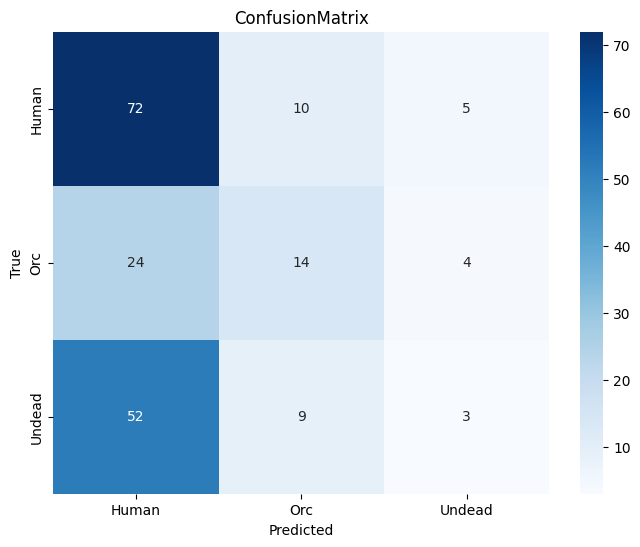


AccuracyRate:
0.46113989637305697

ClassificationReport:
              precision    recall  f1-score   support

       Human       0.49      0.83      0.61        87
         Orc       0.42      0.33      0.37        42
      Undead       0.25      0.05      0.08        64

    accuracy                           0.46       193
   macro avg       0.39      0.40      0.36       193
weighted avg       0.39      0.46      0.38       193



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
#Compute confusion matrix
conf_matrix=confusion_matrix(y,lda_values,labels=lda_model.classes_)

#Compute accuracy rate
accuracy=accuracy_score(y,lda_values)

#Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',
xticklabels=lda_model.classes_, yticklabels=lda_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ConfusionMatrix')
plt.show()
print("\nAccuracyRate:")
print(accuracy)

#Generate classification report
report_ann=classification_report(y,lda_values)
print("\nClassificationReport:")
print(report_ann)

##Step8:
##Draw Score Plot

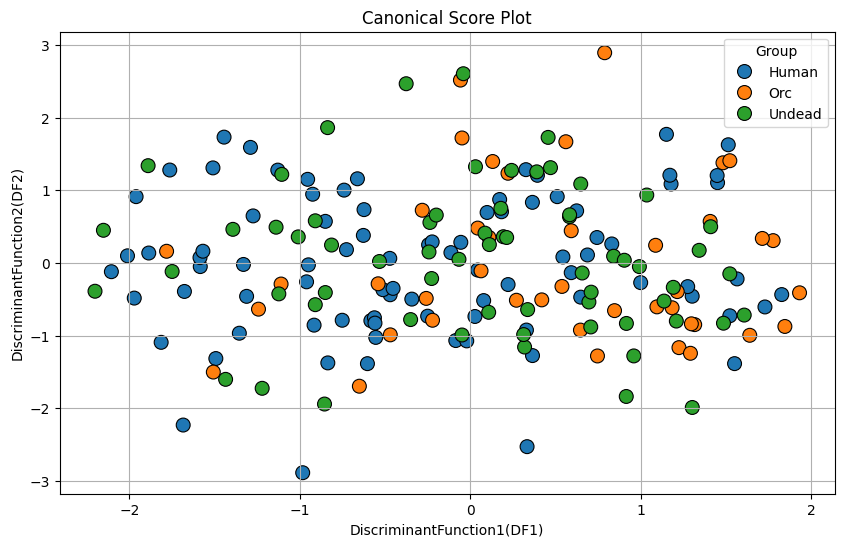

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Convert the canonical variables to a DataFrame
canonical_df=pd.DataFrame(canonical_vars,columns=['DF1','DF2'])
canonical_df['Group'] = y.values # Add the group labels to the DataFrame

#Plotting
plt.figure(figsize=(10,6))
sns.scatterplot(data=canonical_df,x='DF1',y='DF2',hue='Group',s=100,edgecolor="k")

#Add plot details
plt.title('Canonical Score Plot')
plt.xlabel('DiscriminantFunction1(DF1)')
plt.ylabel('DiscriminantFunction2(DF2)')
plt.legend(title='Group')
plt.grid(True)
plt.show()